In [97]:
from functools import partial

import matplotlib.pyplot as plot

import pandas as pd
import numpy as np

from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [148]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Compute the base rate of cancer occurrence over the entire data set.
cancer.target[(cancer.target == 0)].size / cancer.target.size

0.37258347978910367

**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

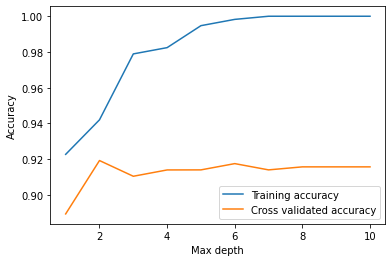

2

In [168]:
RANDOM_SEED=101

max_depths = np.arange(1, 11)
training_accuracies = []
cross_validated_accuracies = []

for i in range(0, len(max_depths)):
    classifier = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=RANDOM_SEED)
    
    cross_validated_accuracy = cross_val_score(classifier, df, cancer.target, cv=10, n_jobs=-1).mean()
    cross_validated_accuracies.append(cross_validated_accuracy)
    
    classifier.fit(df, cancer.target)
    training_accuracy = classifier.score(df, cancer.target)
    training_accuracies.append(training_accuracy)
    
plot.xlabel("Max depth")
plot.ylabel("Accuracy")

line, = plot.plot(max_depths, training_accuracies)
line.set_label("Training accuracy")
    
line, = plot.plot(max_depths, cross_validated_accuracies)
line.set_label("Cross validated accuracy")
    
plot.legend()
plot.show()

# Best max_depth per cross validation
max_depths[cross_validated_accuracies == max(cross_validated_accuracies)][0]

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

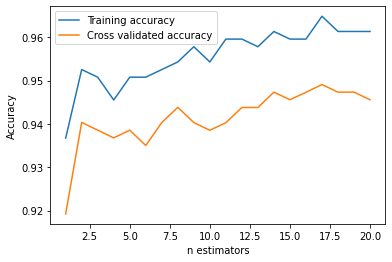

True

In [167]:
max_depth = 2

n_estimators = np.arange(1, 21)
training_accuracies = []
cross_validated_accuracies = []

for i in range(0, len(n_estimators)):
    classifier = ensemble.RandomForestClassifier(n_estimators=n_estimators[i], max_depth=max_depth, random_state=RANDOM_SEED, n_jobs=-1)
    
    cross_validated_accuracy = cross_val_score(classifier, df, cancer.target, cv=10, n_jobs=-1).mean()
    cross_validated_accuracies.append(cross_validated_accuracy)
    
    classifier.fit(df, cancer.target)
    training_accuracy = classifier.score(df, cancer.target)
    training_accuracies.append(training_accuracy)
    
plot.xlabel("n estimators")
plot.ylabel("Accuracy")

line, = plot.plot(n_estimators, training_accuracies)
line.set_label("Training accuracy")
    
line, = plot.plot(n_estimators, cross_validated_accuracies)
line.set_label("Cross validated accuracy")
    
plot.legend()
plot.show()

# Do you see an improvement using random forests versus using a single tree? Yes!
cross_validated_accuracies[0] < max(cross_validated_accuracies)

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

455 114
341 228
227 342
113 456


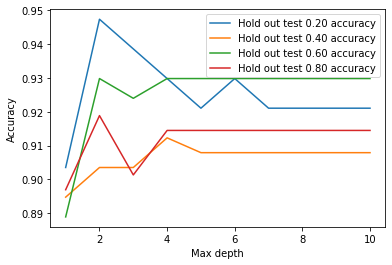

In [169]:
hold_out_ratios = np.arange(.2, 1, .2)
max_depths = np.arange(1, 11)

for hold_out_ratio in hold_out_ratios:
    train_df, test_df, train_target, test_target = train_test_split(df, cancer.target, test_size=hold_out_ratio, random_state=RANDOM_SEED)
    
    testing_accuracies = []

    for i in range(0, len(max_depths)):
        classifier = tree.DecisionTreeClassifier(max_depth=max_depths[i], random_state=RANDOM_SEED)

        classifier.fit(train_df, train_target)
        testing_accuracy = classifier.score(test_df, test_target)
        testing_accuracies.append(testing_accuracy)
    
    line, = plot.plot(max_depths, testing_accuracies)
    line.set_label(f"Hold out test {hold_out_ratio:.2f} accuracy")

plot.xlabel("Max depth")
plot.ylabel("Accuracy")

plot.legend()

plot.show()